In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
wego = pd.read_csv("Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [9]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

1. What is the overall on-time performance, and what do the overall distribution of adherence look like?

In [12]:
# to sum up the adjusted counts
total_early = wego['ADJUSTED_EARLY_COUNT'].sum()
total_late = wego['ADJUSTED_LATE_COUNT'].sum()
total_ontime = wego['ADJUSTED_ONTIME_COUNT'].sum()

# total adjusted obsercations
total_adjusted = total_early + total_late + total_ontime

# on-time performance percentage
ontime_percentage = (total_ontime / total_adjusted) * 100

print(f"Overall On-Time Performance: {ontime_percentage:.2f}%")

Overall On-Time Performance: 79.69%


In [17]:
# Summary statistics for adherence
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

2. How does direction of travel, route, or location affect the on-time performance?

In [18]:
# group by direction of travel, route, or location (time points) and calculate adjusted ontime percentages for each

# by route: 
route_group = wego.groupby('ROUTE_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

route_group['OnTime_Percentage'] = (
    route_group['ADJUSTED_ONTIME_COUNT'] /
    (route_group['ADJUSTED_ONTIME_COUNT'] + route_group['ADJUSTED_LATE_COUNT'] + route_group['ADJUSTED_EARLY_COUNT'])
) * 100

# Show top and bottom routes by on-time performance
route_group.sort_values('OnTime_Percentage', ascending=False).head(10)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,OnTime_Percentage
ROUTE_ABBR,,,,
22,22492,2065,631,89.296490
23,35137,3230,1286,88.611202
50,36309,5113,1207,85.174412
56,48361,8837,1752,82.037320
7,13417,3417,433,77.703133
52,37736,10038,1553,76.501713
3,34516,9590,1382,75.879353
55,42080,16748,1531,69.716198


In [21]:
# by travel (route_direction_name

# Group by direction and calculate adjusted on-time performance
direction_group = wego.groupby('ROUTE_DIRECTION_NAME').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

# Calculate percentage
direction_group['OnTime_Percentage'] = (
    direction_group['ADJUSTED_ONTIME_COUNT'] /
    (direction_group['ADJUSTED_ONTIME_COUNT'] + direction_group['ADJUSTED_LATE_COUNT'] + direction_group['ADJUSTED_EARLY_COUNT'])
) * 100

direction_group.sort_values('OnTime_Percentage', ascending=False)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,OnTime_Percentage
ROUTE_DIRECTION_NAME,,,,
TO DOWNTOWN,135634,19437,4484,85.007678
FROM DOWNTOWN,134414,39601,5291,74.963470


In [22]:
# by location (time_point_abbr) 
location_group = wego.groupby('TIME_POINT_ABBR').agg({
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
})

location_group['OnTime_Percentage'] = (
    location_group['ADJUSTED_ONTIME_COUNT'] /
    (location_group['ADJUSTED_ONTIME_COUNT'] + location_group['ADJUSTED_LATE_COUNT'] + location_group['ADJUSTED_EARLY_COUNT'])
) * 100

# Show locations with best and worst on-time performance
location_group.sort_values('OnTime_Percentage', ascending=True).head(10)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,OnTime_Percentage
TIME_POINT_ABBR,,,,
MCC5_7,2,31,3,5.555556
MCC4_13,19,3,48,27.142857
MCC5_11,21,49,0,30.000000
MCC5_12,16,23,0,41.025641
HEAD,37,3,32,51.388889
MCC4_22,53,34,15,51.960784
DCSCC,1021,699,125,55.338753
MCC4_20,55,43,1,55.555556
MXDONEL,6320,3338,277,63.613488


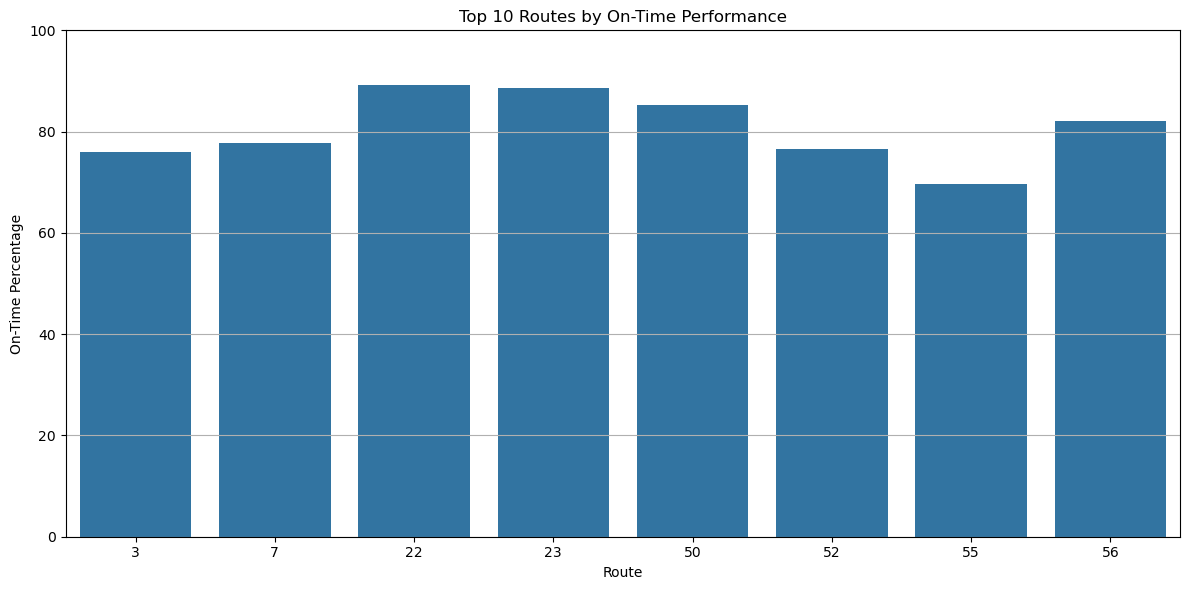

In [24]:
# visualize all 3 

# Example: top 10 routes by on-time %
top_routes = route_group.sort_values('OnTime_Percentage', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='ROUTE_ABBR', y='OnTime_Percentage')
plt.title('Top 10 Routes by On-Time Performance')
plt.ylabel('On-Time Percentage')
plt.xlabel('Route')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3. How does time of day or day of week affect on-time performance?

In [29]:
# 1. Parse datetime from scheduled time
wego['SCHEDULED_DATETIME'] = pd.to_datetime(
    wego['SCHEDULED_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce'
)

# 2. Extract hour and weekday BEFORE filtering
wego['HOUR'] = wego['SCHEDULED_DATETIME'].dt.hour
wego['WEEKDAY'] = wego['SCHEDULED_DATETIME'].dt.day_name()

# 3. Calculate total count and filter out rows with zero total
wego['TOTAL_COUNT'] = (
    wego['ADJUSTED_EARLY_COUNT'] +
    wego['ADJUSTED_LATE_COUNT'] +
    wego['ADJUSTED_ONTIME_COUNT']
)

wego_filtered = wego[wego['TOTAL_COUNT'] > 0].copy()

# 4. Calculate on-time percentage
wego_filtered['ON_TIME_PCT'] = (
    wego_filtered['ADJUSTED_ONTIME_COUNT'] / wego_filtered['TOTAL_COUNT'] * 100
)

# 5. Group by hour and weekday
hourly_perf = wego_filtered.groupby('HOUR')['ON_TIME_PCT'].mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_perf = wego_filtered.groupby('WEEKDAY')['ON_TIME_PCT'].mean().reindex(weekday_order)


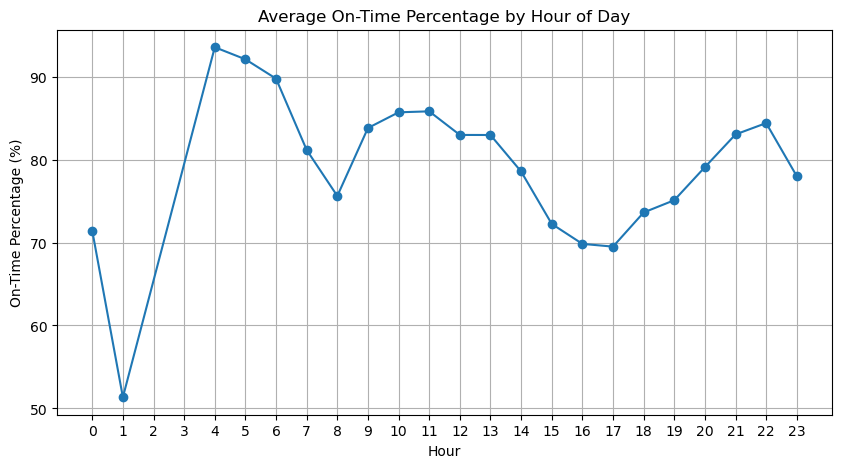

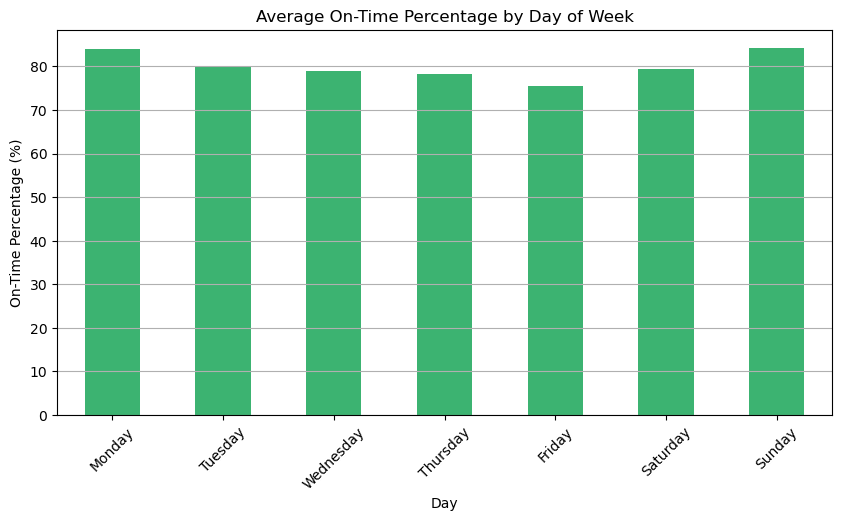

In [30]:
# Hourly plot
plt.figure(figsize=(10, 5))
hourly_perf.plot(marker='o')
plt.title('Average On-Time Percentage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('On-Time Percentage (%)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Weekly plot
plt.figure(figsize=(10, 5))
weekday_perf.plot(kind='bar', color='mediumseagreen')
plt.title('Average On-Time Percentage by Day of Week')
plt.xlabel('Day')
plt.ylabel('On-Time Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

4. How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

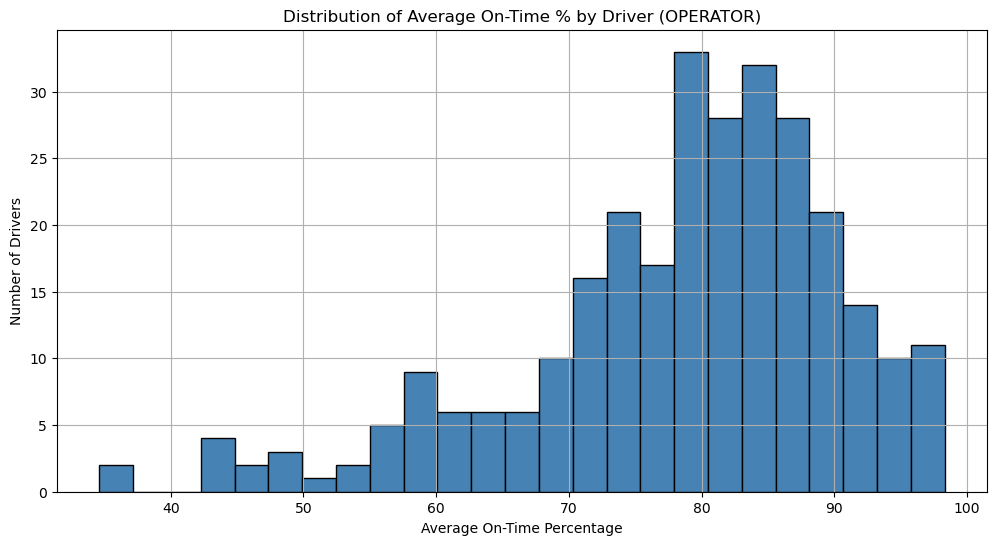

In [31]:
# group by OPERATOR and compute driver's total timpeoint count and on-time %

# 1. Calculate per-row total and on-time %
wego['TOTAL_COUNT'] = (
    wego['ADJUSTED_EARLY_COUNT'] +
    wego['ADJUSTED_LATE_COUNT'] +
    wego['ADJUSTED_ONTIME_COUNT']
)

wego['ON_TIME_PCT'] = (
    wego['ADJUSTED_ONTIME_COUNT'] / wego['TOTAL_COUNT'] * 100
)

# 2. Filter valid rows
wego_driver = wego[wego['TOTAL_COUNT'] > 0].copy()

# 3. Group by operator
operator_perf = wego_driver.groupby('OPERATOR').agg(
    total_points=('TOTAL_COUNT', 'sum'),
    avg_on_time_pct=('ON_TIME_PCT', 'mean'),
    trip_count=('ON_TIME_PCT', 'count')
)

# 4. Filter out operators with few trips (e.g., < 100)
operator_perf_filtered = operator_perf[operator_perf['trip_count'] >= 100]

# 5. Sort by on-time percentage
operator_perf_sorted = operator_perf_filtered.sort_values('avg_on_time_pct', ascending=False)

# 6. Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(operator_perf_filtered['avg_on_time_pct'], bins=25, color='steelblue', edgecolor='black')
plt.title('Distribution of Average On-Time % by Driver (OPERATOR)')
plt.xlabel('Average On-Time Percentage')
plt.ylabel('Number of Drivers')
plt.grid(True)
plt.show()



5. Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

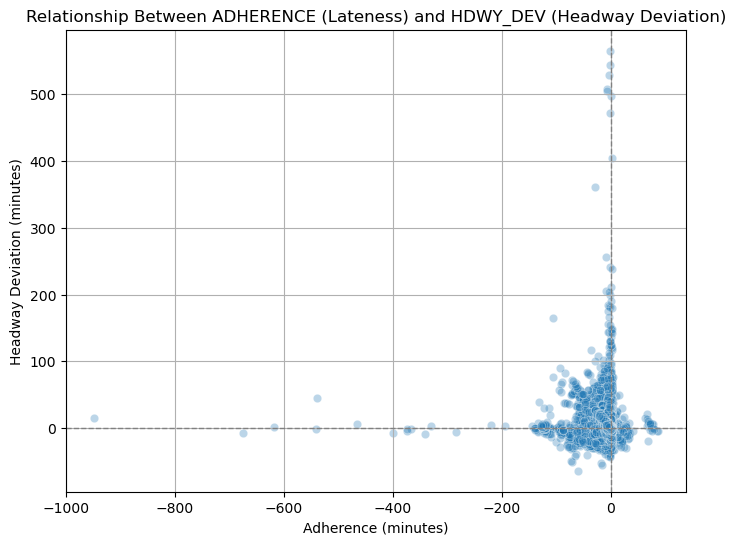

Correlation between ADHERENCE and HDWY_DEV: -0.21


In [32]:
# 1. Filter valid rows
wego_corr = wego[['ADHERENCE', 'HDWY_DEV']].dropna()

# 2. Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wego_corr, x='ADHERENCE', y='HDWY_DEV', alpha=0.3)
plt.title('Relationship Between ADHERENCE (Lateness) and HDWY_DEV (Headway Deviation)')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Headway Deviation (minutes)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

# 3. Correlation
correlation = wego_corr['ADHERENCE'].corr(wego_corr['HDWY_DEV'])
print(f"Correlation between ADHERENCE and HDWY_DEV: {correlation:.2f}")